In [39]:
import numpy as np
import math

k_func = lambda x: np.exp(x)
q_func = lambda x: np.exp(x)
f_func = lambda x: np.sin(x)

betta1, nu1 = 0, 0 
betta2, nu2 = 1, 0
eps = 10 ** (-1)
N = 10
x = np.zeros(N + 1)
y = np.zeros(N + 1)
k = np.zeros(N + 1)
q = np.zeros(N + 1)
fi = np.zeros(N + 1)


# Метод прогонки
Для уравнения вида:
$$\ \frac{d}{dx}\left(k(x)\frac{du}{dx}\right) - q(x)u = -f(x)\$$


вторая производная
$$\ \frac{d^2u}{dx^2} \$$ 
может быть аппроксимирована следующим образом:
$$\ \frac{d^2u}{dx^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}\$$

Здесь $h$ --- шаг сетки, $u_{i+1}, u_i, u_{i-1}$ --- значения функции $u(x)$ в сеточных точках $x_{+1}, x_i, x_{i-1}$.

Коэффициенты $a, b, c$ для трехдиагональной матрицы задаются так:
$$a_j = \frac{k_{j-1} + k_j}{2h^2}, \quad b_j = \frac{k_{j+1} + k_j}{2h^2}, \quad c_j = \frac{k_{j+1} + 2k_j + k_{j-1}}{2h^2} + q_j $$
Эти коэффициенты формируют дискретное уравнение, которое аппроксимирует исходное дифференциальное уравнение на сетке. Система таких уравнений для всех сеточных точек затем решается с помощью метода прогонки.

In [40]:
def set_xkqfi(x, k, q, fi, N, m):
    h = 1.0 / N
    for j in range(N+1):
        x[j] = j * h
        if m == 0:
            fi[j] = math.sin(0.5)
            k[j] = math.exp(0.5)
        else:
            k[j] = math.exp(x[j])
            fi[j] = math.sin(x[j])
        q[j] = k[j]

# Применим функцию для инициализации массивов
set_xkqfi(x, k, q, fi, N, 1)
# print("x:", x)
# print("k:", k)
# print("q:", q)
# print("fi:", fi)



In [41]:
def sweep_method(y, k, fi, q, N):
    h = 1.0 / N
    alf = np.zeros(N + 1)
    bet = np.zeros(N + 1)
    a = np.zeros(N + 1)
    b = np.zeros(N + 1)
    c = np.zeros(N + 1)

    # Fill up the tridiagonal matrix
    for j in range(1, N):
        b[j] = (k[j + 1] + k[j]) / (2 * h ** 2)
        a[j] = (k[j - 1] + k[j]) / (2 * h ** 2)
        c[j] = (k[j + 1] + 2 * k[j] + k[j - 1]) / (2 * h ** 2) + q[j]

    # Standard boundary condition at x = 0
    b[0] = k[0] / h + betta1
    c[0] = -k[0] / h
    bet[0] = nu1

    # Forward sweep
    alf[1] = c[0] / b[0]
    bet[1] = bet[0] / b[0]
    

    for j in range(1, N):
        alf[j + 1] = b[j] / (c[j] - a[j] * alf[j])
        bet[j + 1] = (fi[j] + a[j] * bet[j]) / (c[j] - a[j] * alf[j])

    # Standard boundary condition at x = 1
    a[-1] = -k[-1] / h
    b[-1] = k[-1] / h + betta2
    bet[-1] = nu2

    # Backward substitution
    y[N] = bet[-1] / (1 - alf[-1] * a[-1] / b[-1])

    for j in range(N - 1, -1, -1):
        y[j] = alf[j + 1] * y[j + 1] + bet[j + 1]
# Применим метод прогонки для нахождения y
sweep_method(y, k, fi, q, N)
# print("y:", y)


In [42]:
# Удваиваем количество отрезков
N_new = 2 * N 

# Инициализация новых массивов
x_new = np.zeros(N_new + 1)
y_new = np.zeros(N_new + 1)
k_new = np.zeros(N_new + 1)
q_new = np.zeros(N_new + 1)
fi_new = np.zeros(N_new + 1)

# Заполнение новых массивов
set_xkqfi(x_new, k_new, q_new, fi_new, N_new, 1)

# Применение метода прогонки для нового N
sweep_method(y_new, k_new, fi_new, q_new, N_new)
# print("y_new:", y_new)
# print table of x y y_new



In [43]:
def max1(y, u, N, m):
    mx = 0
    if m == 0:
        for i in range(N):
            if mx < abs(u[i] - y[i]):
                mx = abs(u[i] - y[i])
    else:
        for i in range(N):
            if mx < abs(u[2 * i] - y[i]) / 3:
                mx = abs(u[2 * i] - y[i]) / 3
    return mx

In [44]:
current_error = 1.0 
y_cur = y
fix_N = N
while (current_error > eps):
    N_new = 2 * N
    x_new = np.zeros(N_new + 1)
    y_new = np.zeros(N_new + 1)
    k_new = np.zeros(N_new + 1)
    q_new = np.zeros(N_new + 1)
    fi_new = np.zeros(N_new + 1)
    set_xkqfi(x_new, k_new, q_new, fi_new, N_new, 1)
    sweep_method(y_new, k_new, fi_new, q_new, N_new)
    current_error = max1(y_cur, y_new, N, 1)
    print(f"N = {N}, error = {current_error}")
    N = N_new
    y_cur = y_new

print('')
print(f"y_N,        y_{N_new//fix_N}N")
for i in range(len(y)):
    print(f"{y[i]:.8f} {y_new[i]:.8f}")


N = 10, error = 0.001750579818327715

y_N,        y_2N
-0.00483278 -0.00258793
0.00483278 0.00258793
0.01276625 0.00740178
0.01852072 0.01177871
0.02182365 0.01565737
0.02253965 0.01898855
0.02063907 0.02173390
0.01617141 0.02386469
0.00924328 0.02536074
0.00000000 0.02620938
0.00000000 0.02640447


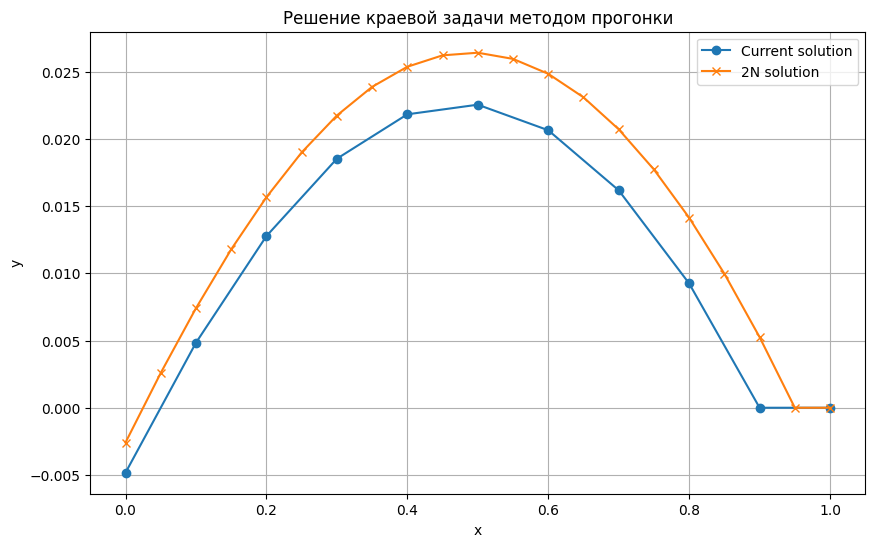

In [45]:
import matplotlib.pyplot as plt
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', label = "Current solution")
plt.plot(x_new, y_new, marker='x', label = f"{N_new//fix_N}N solution")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Решение краевой задачи методом прогонки")
plt.legend()
plt.grid(True)
plt.show()


Error between model and current solution 0.002252348023186558


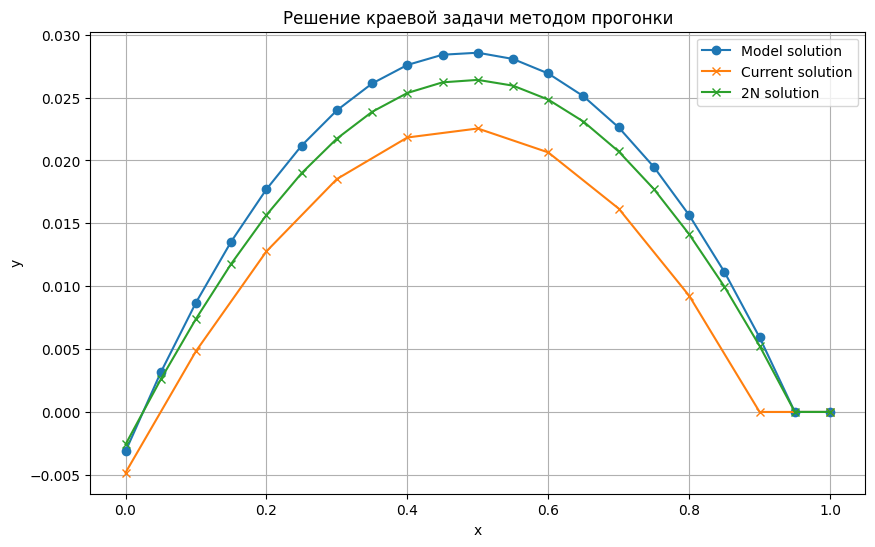

In [46]:
N_model = N 
x_model = np.zeros(N_model + 1)
y_model = np.zeros(N_model + 1)
k_model = np.zeros(N_model + 1)
q_model = np.zeros(N_model + 1)
fi_model = np.zeros(N_model + 1)

set_xkqfi(x_model, k_model, q_model, fi_model, N_model, 0)
sweep_method(y_model, k_model, fi_model, q_model, N_model)

# error between model and not model
print("Error between model and current solution", max1(y_model, y_new, N_model, 0))

# now we have to plot model, N and 2N solutions
plt.figure(figsize=(10, 6))
plt.plot(x_model, y_model, marker='o', label = "Model solution")
plt.plot(x, y, marker='x', label = "Current solution")
plt.plot(x_new, y_new, marker='x', label = f"{N_new//fix_N}N solution")


plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Решение краевой задачи методом прогонки")
plt.show()


# Сравнение аналитического и численного решения модельной задачи

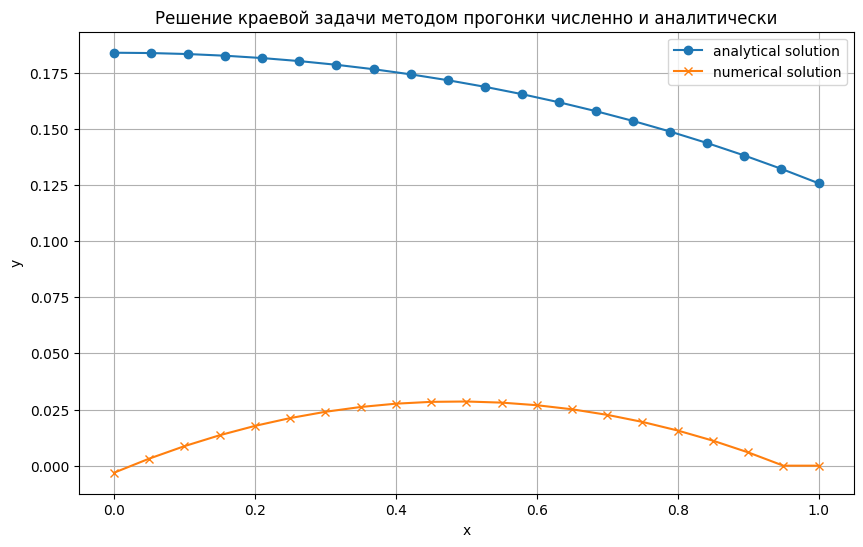

In [47]:
# model analytical solve 
# def solve_func(x):
#     return (-0.053487 *(np.exp(x) + np.exp(-x)) + 0.290787)

def solve_func(x_test):
    t = np.sin(0.5)/np.exp(0.5)
    constants = (-1) * t / (2 *(np.exp(1)))
    return (constants * (np.exp(x_test) + np.exp(-x_test)) + t)

# plot for it 
x = np.linspace(0, 1, N_model)
y = solve_func(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"analytical solution", marker='o')
plt.plot(x_model, y_model, marker ='x', label = f"numerical solution")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Решение краевой задачи методом прогонки численно и аналитически")

plt.legend()
plt.grid(True)
plt.show()
